In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb
from sklearn.model_selection import train_test_split

import scipy as sc
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import keras 
import tensorflow


from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform



In [ ]:
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
features_df = pd.read_csv("/content/drive/MyDrive/ML Learning csv/training_set_features.csv",index_col="respondent_id")

In [ ]:
labels_df = pd.read_csv("/content/drive/MyDrive/ML Learning csv/training_set_labels.csv",index_col="respondent_id")

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/ML Learning csv/test_set_features.csv",index_col="respondent_id")

In [ ]:
features_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN


Selecting model params

In [ ]:
# Selecting columns for the model
model_columns = ['h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 
       'household_adults', 'household_children', 'employment_industry']

In [ ]:
features_df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

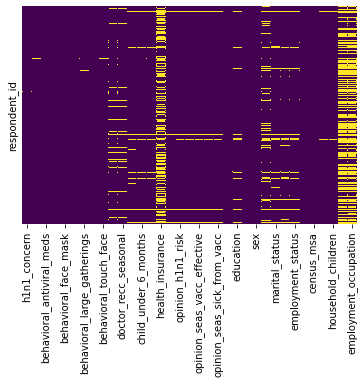

In [ ]:
sns.heatmap(features_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#propotion of missing values
null_count = features_df.isnull().sum()
null_percentage = round((features_df.isnull().sum()/features_df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : features_df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
34,employment_occupation,13470,50.44
33,employment_industry,13330,49.91
14,health_insurance,12274,45.96
25,income_poverty,4423,16.56
9,doctor_recc_h1n1,2160,8.09
10,doctor_recc_seasonal,2160,8.09
27,rent_or_own,2042,7.65
28,employment_status,1463,5.48
26,marital_status,1408,5.27
22,education,1407,5.27


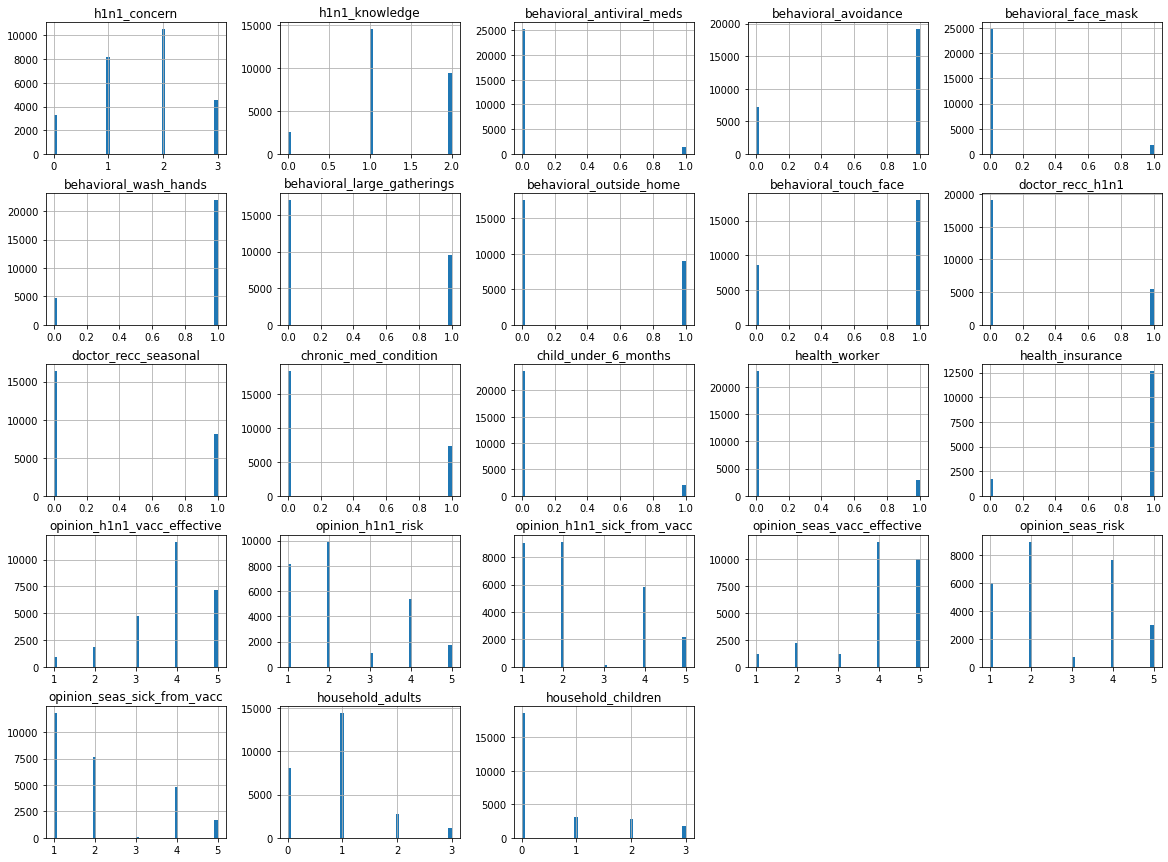

In [ ]:
#plot a histogram for each numerical attribute
%matplotlib inline  
import matplotlib.pyplot as plt
features_df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
features_df = features_df.drop(columns=['employment_industry','employment_occupation'])
test_df = test_df.drop(columns=['employment_industry','employment_occupation'])

In [ ]:
#Based missing values, the age category for the most blank cells is closer to 1.26 which is the mean versus the median

h1n1_knowledge_mean = features_df['h1n1_knowledge'].mean()
h1n1_knowledge_mean

1.2625324357865444

In [ ]:
features_df['h1n1_knowledge'].fillna(h1n1_knowledge_mean,inplace=True)

In [ ]:
h1n1_knowledge_mean = test_df['h1n1_knowledge'].mean()
h1n1_knowledge_mean
test_df['h1n1_knowledge'].fillna(h1n1_knowledge_mean,inplace=True)

In [ ]:
behavioral_antiviral_meds_mean =features_df['behavioral_antiviral_meds'].mean()
behavioral_antiviral_meds_mean
features_df['behavioral_antiviral_meds'].fillna(behavioral_antiviral_meds_mean,inplace=True)

In [ ]:
behavioral_antiviral_meds_mean =test_df['behavioral_antiviral_meds'].mean()
behavioral_antiviral_meds_mean
test_df['behavioral_antiviral_meds'].fillna(behavioral_antiviral_meds_mean,inplace=True)

In [ ]:
behavioral_avoidance_mean = features_df['behavioral_avoidance'].mean()
behavioral_avoidance_mean
features_df['behavioral_avoidance'].fillna(behavioral_avoidance_mean,inplace=True)

In [ ]:
behavioral_avoidance_mean = test_df['behavioral_avoidance'].mean()
behavioral_avoidance_mean
test_df['behavioral_avoidance'].fillna(behavioral_avoidance_mean,inplace=True)

In [ ]:
behavioral_face_mask_mean = features_df['behavioral_face_mask'].mean()
behavioral_face_mask_mean
features_df['behavioral_face_mask'].fillna(behavioral_face_mask_mean,inplace=True)

In [ ]:
behavioral_face_mask_mean = test_df['behavioral_face_mask'].mean()
behavioral_face_mask_mean
test_df['behavioral_face_mask'].fillna(behavioral_face_mask_mean,inplace=True)

In [ ]:
behavioral_wash_hands_mean =features_df['behavioral_wash_hands'].mean()
behavioral_wash_hands_mean
features_df['behavioral_wash_hands'].fillna(behavioral_wash_hands_mean,inplace=True)

In [ ]:
behavioral_wash_hands_mean =test_df['behavioral_wash_hands'].mean()
behavioral_wash_hands_mean
test_df['behavioral_wash_hands'].fillna(behavioral_wash_hands_mean,inplace=True)

In [ ]:
behavioral_large_gatherings_mean = features_df['behavioral_large_gatherings'].mean()
behavioral_large_gatherings_mean
features_df['behavioral_large_gatherings'].fillna(behavioral_large_gatherings_mean,inplace=True)

In [ ]:
behavioral_large_gatherings_mean = test_df['behavioral_large_gatherings'].mean()
behavioral_large_gatherings_mean
test_df['behavioral_large_gatherings'].fillna(behavioral_large_gatherings_mean,inplace=True)

In [ ]:
behavioral_outside_home_mean = features_df['behavioral_outside_home'].mean()
behavioral_outside_home_mean
features_df['behavioral_outside_home'].fillna(behavioral_outside_home_mean,inplace=True)

In [ ]:
behavioral_outside_home_mean = test_df['behavioral_outside_home'].mean()
behavioral_outside_home_mean
test_df['behavioral_outside_home'].fillna(behavioral_outside_home_mean,inplace=True)

In [ ]:
behavioral_touch_face_mean = features_df['behavioral_touch_face'].mean()
behavioral_touch_face_mean
features_df['behavioral_touch_face'].fillna(behavioral_touch_face_mean,inplace=True)

In [ ]:
behavioral_touch_face_mean = test_df['behavioral_touch_face'].mean()
behavioral_touch_face_mean
test_df['behavioral_touch_face'].fillna(behavioral_touch_face_mean,inplace=True)

In [ ]:
doctor_recc_h1n1_mean = test_df['doctor_recc_h1n1'].mean()
doctor_recc_h1n1_mean
test_df['doctor_recc_h1n1'].fillna(doctor_recc_h1n1_mean,inplace=True)

In [ ]:
doctor_recc_h1n1_mean = features_df['doctor_recc_h1n1'].mean()
doctor_recc_h1n1_mean
features_df['doctor_recc_h1n1'].fillna(doctor_recc_h1n1_mean,inplace=True)

In [ ]:
doctor_recc_seasonal_mean = features_df['doctor_recc_seasonal'].mean()
doctor_recc_seasonal_mean
features_df['doctor_recc_seasonal'].fillna(doctor_recc_seasonal_mean,inplace=True)

In [ ]:
doctor_recc_seasonal_mean = test_df['doctor_recc_seasonal'].mean()
doctor_recc_seasonal_mean
test_df['doctor_recc_seasonal'].fillna(doctor_recc_seasonal_mean,inplace=True)

In [ ]:
chronic_med_condition_mean = features_df['chronic_med_condition'].mean()
chronic_med_condition_mean
features_df['chronic_med_condition'].fillna(chronic_med_condition_mean,inplace=True)

In [ ]:
chronic_med_condition_mean = test_df['chronic_med_condition'].mean()
chronic_med_condition_mean
test_df['chronic_med_condition'].fillna(chronic_med_condition_mean,inplace=True)

In [ ]:
child_under_6_months_mean = features_df['child_under_6_months'].mean()
child_under_6_months_mean
features_df['child_under_6_months'].fillna(child_under_6_months_mean,inplace=True)

In [ ]:
child_under_6_months_mean = test_df['child_under_6_months'].mean()
child_under_6_months_mean
test_df['child_under_6_months'].fillna(child_under_6_months_mean,inplace=True)

In [ ]:
health_worker_mean = features_df['health_worker'].mean()
health_worker_mean
features_df['health_worker'].fillna(health_worker_mean,inplace=True)

In [ ]:
health_worker_mean = test_df['health_worker'].mean()
health_worker_mean
test_df['health_worker'].fillna(health_worker_mean,inplace=True)

In [ ]:
health_insurance_mean = features_df['health_insurance'].mean()
health_insurance_mean
features_df['health_insurance'].fillna(health_insurance_mean,inplace=True)

In [ ]:
health_insurance_mean = test_df['health_insurance'].mean()
health_insurance_mean
test_df['health_insurance'].fillna(health_insurance_mean,inplace=True)

In [ ]:
opinion_h1n1_vacc_effective_mean = features_df['opinion_h1n1_vacc_effective'].mean()
opinion_h1n1_vacc_effective_mean
features_df['opinion_h1n1_vacc_effective'].fillna(opinion_h1n1_vacc_effective_mean,inplace=True)

In [ ]:
opinion_h1n1_vacc_effective_mean = test_df['opinion_h1n1_vacc_effective'].mean()
opinion_h1n1_vacc_effective_mean
test_df['opinion_h1n1_vacc_effective'].fillna(opinion_h1n1_vacc_effective_mean,inplace=True)

In [ ]:
opinion_h1n1_risk_mean = features_df['opinion_h1n1_risk'].mean()
opinion_h1n1_risk_mean
features_df['opinion_h1n1_risk'].fillna(opinion_h1n1_risk_mean,inplace=True)

In [ ]:
opinion_h1n1_risk_mean = test_df['opinion_h1n1_risk'].mean()
opinion_h1n1_risk_mean
test_df['opinion_h1n1_risk'].fillna(opinion_h1n1_risk_mean,inplace=True)

In [ ]:
opinion_h1n1_sick_from_vacc_mean = features_df['opinion_h1n1_sick_from_vacc'].mean()
opinion_h1n1_sick_from_vacc_mean
features_df['opinion_h1n1_sick_from_vacc'].fillna(opinion_h1n1_sick_from_vacc_mean,inplace=True)

In [ ]:
opinion_h1n1_sick_from_vacc_mean = test_df['opinion_h1n1_sick_from_vacc'].mean()
opinion_h1n1_sick_from_vacc_mean
test_df['opinion_h1n1_sick_from_vacc'].fillna(opinion_h1n1_sick_from_vacc_mean,inplace=True)

In [ ]:
household_adults_mean = features_df['household_adults'].mean()
household_adults_mean
features_df['household_adults'].fillna(household_adults_mean,inplace=True)

In [ ]:
household_adults_mean = test_df['household_adults'].mean()
household_adults_mean
test_df['household_adults'].fillna(household_adults_mean,inplace=True)

In [ ]:
household_children_mean = features_df['household_children'].mean()
household_children_mean
features_df['household_children'].fillna(household_children_mean,inplace=True)

In [ ]:
household_children_mean = test_df['household_children'].mean()
household_children_mean
test_df['household_children'].fillna(household_children_mean,inplace=True)

In [ ]:
h1n1_concern_mean = features_df['h1n1_concern'].mean()
h1n1_concern_mean
features_df['h1n1_concern'].fillna(h1n1_concern_mean,inplace=True)

In [ ]:
h1n1_concern_mean = test_df['h1n1_concern'].mean()
h1n1_concern_mean
test_df['h1n1_concern'].fillna(h1n1_concern_mean,inplace=True)

In [ ]:
#opinion_seas_vacc_effective
opinion_seas_vacc_effective_mean = features_df['opinion_seas_vacc_effective'].mean()
opinion_seas_vacc_effective_mean
features_df['opinion_seas_vacc_effective'].fillna(opinion_seas_vacc_effective_mean,inplace=True)

In [ ]:
#opinion_seas_vacc_effective
opinion_seas_vacc_effective_mean = test_df['opinion_seas_vacc_effective'].mean()
opinion_seas_vacc_effective_mean
test_df['opinion_seas_vacc_effective'].fillna(opinion_seas_vacc_effective_mean,inplace=True)

In [ ]:
#opinion_seas_risk
opinion_seas_risk_mean = features_df['opinion_seas_risk'].mean()
opinion_seas_risk_mean
features_df['opinion_seas_risk'].fillna(opinion_seas_risk_mean,inplace=True)

In [ ]:
#opinion_seas_risk
opinion_seas_risk_mean = test_df['opinion_seas_risk'].mean()
opinion_seas_risk_mean
test_df['opinion_seas_risk'].fillna(opinion_seas_risk_mean,inplace=True)

In [ ]:
#opinion_seas_sick_from_vacc
opinion_seas_sick_from_vacc_mean = features_df['opinion_seas_sick_from_vacc'].mean()
opinion_seas_sick_from_vacc_mean
features_df['opinion_seas_sick_from_vacc'].fillna(opinion_seas_sick_from_vacc_mean,inplace=True)

In [ ]:
#opinion_seas_sick_from_vacc
opinion_seas_sick_from_vacc_mean = test_df['opinion_seas_sick_from_vacc'].mean()
opinion_seas_sick_from_vacc_mean
test_df['opinion_seas_sick_from_vacc'].fillna(opinion_seas_sick_from_vacc_mean,inplace=True)

In [ ]:
#education
features_df['education'].fillna('College Graduate',inplace=True)
test_df['education'].fillna('College Graduate',inplace=True)

In [ ]:
#rent_or_own
features_df['rent_or_own'].fillna('Own',inplace=True)
test_df['rent_or_own'].fillna('Own',inplace=True)

In [ ]:
#employment_status 
features_df['employment_status'].fillna('Employed',inplace=True)

In [ ]:
test_df['employment_status'].fillna('Employed',inplace=True)

In [ ]:
#employment_status 
employment_status_mode = test_df['employment_status'].mode()
employment_status_mode
test_df['employment_status'].fillna(employment_status_mode,inplace=True)

In [ ]:
#income_poverty
features_df['income_poverty'].fillna('<= $75,000, Above Poverty',inplace=True)
test_df['income_poverty'].fillna('<= $75,000, Above Poverty',inplace=True)

In [ ]:
#marital_status
features_df['marital_status'].fillna('Married',inplace=True)
test_df['marital_status'].fillna('Married',inplace=True)

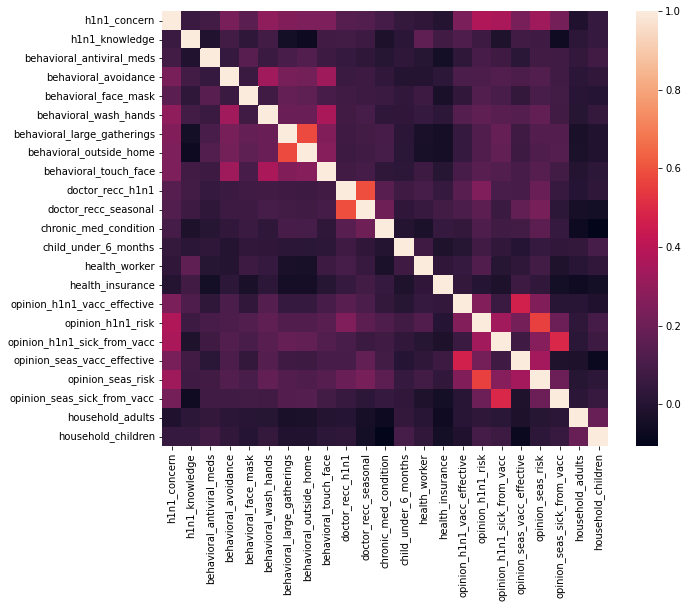

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(features_df.corr())

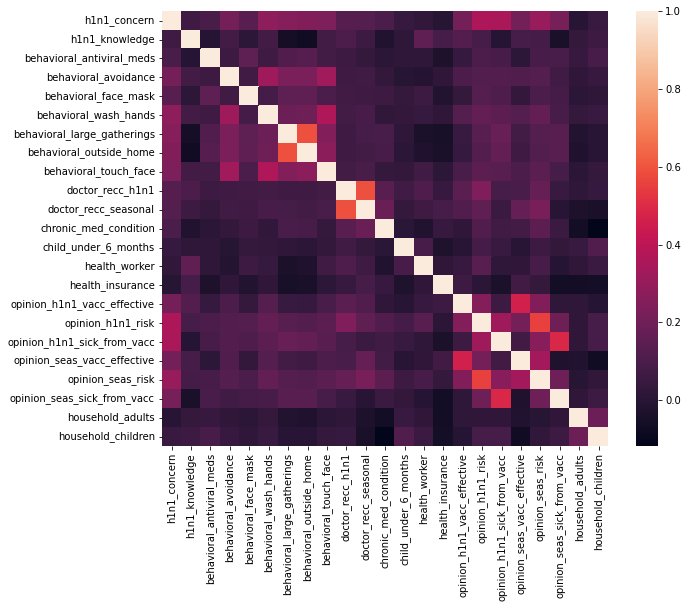

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(test_df.corr())

In [ ]:
features_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,0.000000,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.220312,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,0.000000,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,1.000000,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.000000,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0


In [ ]:
features_df.dtypes != "object"

h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                      False
race                           False
sex                            False
income_poverty                 False
marital_status                 False
r

In [ ]:
categorical_cols = features_df.columns[features_df.dtypes == "object"].values
print(categorical_cols)

['age_group' 'education' 'race' 'sex' 'income_poverty' 'marital_status'
 'rent_or_own' 'employment_status' 'hhs_geo_region' 'census_msa']


In [ ]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [ ]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='most_frequent'))
])

categorical_transformer = Pipeline(steps=[
      ('encoder', OneHotEncoder(handle_unknown='ignore',sparse=False)),
      ])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)


preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ],
    remainder = "drop"
)

In [ ]:
features_df.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [ ]:
features_df.head(20)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.220312,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.000000,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0
8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,...,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0


# Model for h1n1 vaccine

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor as gbdt

In [ ]:
clf = lgb.LGBMClassifier(num_leaves=31, objective='binary', n_estimators=200)

In [ ]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", clf),
])

In [ ]:
# train test split
X_train, X_val, y_train, y_val = train_test_split(features_df,labels_df['h1n1_vaccine'], test_size = 0.3, random_state=0)

In [ ]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gather...
       'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                

In [ ]:
#params = # specify your configurations as a dict
features_df[categorical_cols] = features_df[categorical_cols].astype('category')

rs_params = {
    
      'bagging_fraction': (0.012, 0.25, 0.5),
      'bagging_frequency': (10, 12, 16, 20),
      'feature_fraction': (0.18,0.22, 0.35,0.5),
      "feature_fraction_bynode": (0.8,0.12,0.15),
      'max_depth': (5,8,10),
      'min_data_in_leaf': (100, 120, 140, 165),
      'num_leaves': (1350, 1550, 1700),
      "cat_l2": (9,10,12),
      "cat_smooth": (9,10,12),
      "colsample_bytree":(0.7,0.8,0.9,1),
      "learning_rate": (0.03,0.04,0.05),
      "max_depth": (5, 8, 10 ),
      "min_child_samples": (63,70,75),
      "path_smooth": (0,1,2),
      "reg_alpha":  (0.04,0.05,0.06),
      "reg_lambda": (0.05,0.06,0.07),
      "subsample_freq": (0,1),
      "extra_trees": (False,True),
      "is_unbalance": (True,False),
      "booster": 'gbdt',
      "n_jobs": (0,1),
      "verbosity": (-1,0),
      "seed": (42,44)

  
}

fit_params= {
    'feature_name': "auto",
    'categorical_feature': categorical_cols,
}

In [ ]:
# Initialize a RandomizedSearchCV object using 5-fold CV-
search = RandomizedSearchCV(clf,rs_params, cv = 5, n_iter=100,verbose=1)

# Train on training data-
search.fit(X_train, y_train,verbose=1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(n_estimators=200,
                                            objective='binary'),
                   n_iter=100,
                   param_distributions={'bagging_fraction': (0.012, 0.25, 0.5),
                                        'bagging_frequency': (10, 12, 16, 20),
                                        'booster': 'gbdt',
                                        'cat_l2': (9, 10, 12),
                                        'cat_smooth': (9, 10, 12),
                                        'colsample_bytree': (0.7, 0.8, 0.9, 1),
                                        'extra_trees': (False, True),
                                        'feature_fraction': (0.18, 0.22, 0.35,
                                                             0.5),
                                        '...
                                                                    0.15),
                                        'is_unbalance

In [ ]:
y_pred = search.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6279
           1       0.75      0.48      0.59      1734

    accuracy                           0.85      8013
   macro avg       0.81      0.72      0.75      8013
weighted avg       0.84      0.85      0.84      8013



In [ ]:
search.best_params_

{'bagging_fraction': 0.5,
 'bagging_frequency': 20,
 'booster': 'g',
 'cat_l2': 10,
 'cat_smooth': 10,
 'colsample_bytree': 0.7,
 'extra_trees': True,
 'feature_fraction': 0.35,
 'feature_fraction_bynode': 0.12,
 'is_unbalance': False,
 'learning_rate': 0.04,
 'max_depth': 10,
 'min_child_samples': 75,
 'min_data_in_leaf': 100,
 'n_jobs': 0,
 'num_leaves': 1350,
 'path_smooth': 1,
 'reg_alpha': 0.04,
 'reg_lambda': 0.06,
 'seed': 44,
 'subsample_freq': 1,
 'verbosity': -1}

In [ ]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_verbosity,param_subsample_freq,param_seed,param_reg_lambda,param_reg_alpha,param_path_smooth,...,param_bagging_fraction,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.094583,0.020297,0.104275,0.001700,0,1,42,0.05,0.06,1,...,0.5,"{'verbosity': 0, 'subsample_freq': 1, 'seed': ...",0.852634,0.850227,0.856646,0.860658,0.853933,0.854820,0.003580,12
1,0.808487,0.008568,0.083224,0.005175,-1,1,42,0.07,0.06,1,...,0.5,"{'verbosity': -1, 'subsample_freq': 1, 'seed':...",0.799947,0.813052,0.807435,0.797272,0.791332,0.801808,0.007640,65
2,0.844533,0.010675,0.117044,0.002051,-1,0,42,0.07,0.06,2,...,0.25,"{'verbosity': -1, 'subsample_freq': 0, 'seed':...",0.853972,0.851297,0.856379,0.861728,0.853665,0.855408,0.003546,5
3,0.566009,0.010833,0.080098,0.002586,-1,1,44,0.07,0.06,2,...,0.25,"{'verbosity': -1, 'subsample_freq': 1, 'seed':...",0.850495,0.851565,0.852902,0.861460,0.851792,0.853643,0.003983,24
4,0.527872,0.008790,0.081143,0.002617,-1,0,42,0.06,0.04,0,...,0.012,"{'verbosity': -1, 'subsample_freq': 0, 'seed':...",0.847553,0.850762,0.850762,0.859856,0.845907,0.850968,0.004824,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.579826,0.016739,0.081261,0.001009,0,0,42,0.05,0.05,0,...,0.012,"{'verbosity': 0, 'subsample_freq': 0, 'seed': ...",0.792190,0.800481,0.799679,0.789248,0.787587,0.793837,0.005312,74
96,0.551841,0.015809,0.087401,0.003919,0,0,44,0.07,0.05,2,...,0.012,"{'verbosity': 0, 'subsample_freq': 0, 'seed': ...",0.798609,0.805830,0.803691,0.791388,0.789727,0.797849,0.006421,69
97,0.721569,0.012449,0.117664,0.002443,-1,0,42,0.06,0.04,1,...,0.25,"{'verbosity': -1, 'subsample_freq': 0, 'seed':...",0.849425,0.853437,0.854507,0.859321,0.850455,0.853429,0.003486,27
98,0.660697,0.018559,0.079419,0.002103,0,0,42,0.05,0.05,1,...,0.25,"{'verbosity': 0, 'subsample_freq': 0, 'seed': ...",0.854239,0.853437,0.856379,0.860658,0.852595,0.855461,0.002886,4


In [ ]:
#clf4 = lgb.LGBMClassifier(nbagging_fraction = 0.012, bagging_frequency = 20, feature_fraction = 0.22, max_depth = 5, min_data_in_leaf = 100,num_leaves = 1350)

In [ ]:
#clf4.fit(X_train, y_train)

In [ ]:
# Train data prediction
y_hat = search.predict(X_train)

In [ ]:
preds = search.predict_proba(X_val)
preds

array([[0.90738983, 0.09261017],
       [0.97777401, 0.02222599],
       [0.16456177, 0.83543823],
       ...,
       [0.96908886, 0.03091114],
       [0.98332252, 0.01667748],
       [0.95135841, 0.04864159]])

In [ ]:
# Train data confusion matrix
pd.crosstab(y_train, y_hat)

col_0,0,1
h1n1_vaccine,,
0,14234,520
1,1854,2086


In [ ]:
# Validation data confusion matrix
y_hat_val = search.predict(X_val)
pd.crosstab(y_val, y_hat_val)

col_0,0,1
h1n1_vaccine,,
0,6003,276
1,896,838


In [ ]:
# Predicting probs for final data
y_hat_test_h1n1 = full_pipeline.predict_proba(test_df)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_val, y_hat_val))

0.8537376762760515


In [ ]:
roc_auc_score(y_val, y_hat_val)

0.7196598096252075

# Model for seasonal vaccine


In [ ]:
clf2=lgb.LGBMClassifier(num_leaves=31, objective='binary', n_estimators=200)

In [ ]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("clf2", clf2),
])

In [ ]:
# train test split
X_train, X_val, y_train, y_val = train_test_split(features_df,labels_df['seasonal_vaccine'], test_size = 0.3, random_state=0)

In [ ]:
full_pipeline.fit(X_train, y_train)

In [ ]:
#params = # specify your configurations as a dict
features_df[categorical_cols] = features_df[categorical_cols].astype('category')

rs_params = {
    

      'bagging_fraction': (0.012, 0.25, 0.5),
      'bagging_frequency': (10, 12, 16, 20),
      'feature_fraction': (0.18, 0.22, 0.35, 0.5),
      'max_depth': (5, 8, 10 ),
      'min_data_in_leaf': (100, 120, 140, 165),
      'num_leaves': (1350, 1550, 1700),
      "cat_l2": 10,
      "cat_smooth": 10,
      "colsample_bytree": 0.8,
      "feature_fraction_bynode": (0,8, 0.12, 0.15),
      "learning_rate": 0.03,
      "max_depth": (5, 8, 10 ),
      "min_child_samples": 63,
      "min_data_in_leaf": (100, 120, 140, 165),
      "extra_trees": False,
      "is_unbalance": True,
      "boosting_type": 'gbdt',
      "n_jobs": 1,
      "verbosity": -1,
      "seed": 42,
}

fit_params= {
    'feature_name': "auto",
    'categorical_feature': categorical_cols,
}

In [ ]:
# Initialize a RandomizedSearchCV object using 5-fold CV-
search2 = RandomizedSearchCV(clf2,rs_params, cv = 5, n_iter=100,verbose=1)

# Train on training data-
search2.fit(X_train, y_train,verbose=1)

In [ ]:
y_pred = search2.predict(X_val)
print(classification_report(y_val, y_pred))

In [ ]:
search2.best_params_

In [ ]:
pd.DataFrame(search2.cv_results_)

In [ ]:
# Train data prediction
y_hat = search2.predict(X_train)

In [ ]:
preds = search2.predict_proba(X_val)
preds

In [ ]:
# Train data confusion matrix
pd.crosstab(y_train, y_hat)

In [ ]:
# Validation data confusion matrix
y_hat_val = search2.predict(X_val)
pd.crosstab(y_val, y_hat_val)

In [ ]:
# Predicting probs for final data
y_hat_test_seasonal = full_pipeline.predict_proba(test_df)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_val, y_hat_val))

In [ ]:
roc_auc_score(y_val, y_hat_val)

# Submisison data

In [ ]:
# importing submision data
submission_df = pd.read_csv("/content/drive/MyDrive/ML Learning csv/submission_format.csv",index_col="respondent_id")

In [ ]:
submission_df.to_csv('my_submission.csv', index=True)

In [ ]:
# filling with our predictied probabilities
submission_df['h1n1_vaccine'] = y_hat_test_h1n1[:, 1]
submission_df['seasonal_vaccine'] = y_hat_test_seasonal[:, 1]

In [ ]:
# Saving it
#submission_df.to_csv('my_submission_lgbm.csv', index=True)